In [23]:
import json
import os
import pickle

import matplotlib
import numpy as np
from skimage import feature, io, transform, util
from sklearn import model_selection

In [24]:
DATA_DIRECTORY = "data"
MEN_DIRECTORY = os.path.join(DATA_DIRECTORY, "men")
WOMEN_DIRECTORY = os.path.join(DATA_DIRECTORY, "women")
LABELS_FILENAME = os.path.join(DATA_DIRECTORY, "labels.jsonl")

In [25]:
paths: list[str] = []
labels: list[int] = []
with open(LABELS_FILENAME, "r") as f:
    for line in f:
        entry = json.loads(line)
        path = entry["image_url"]
        label = int(entry["label"])
        paths.append(path)
        labels.append(label)

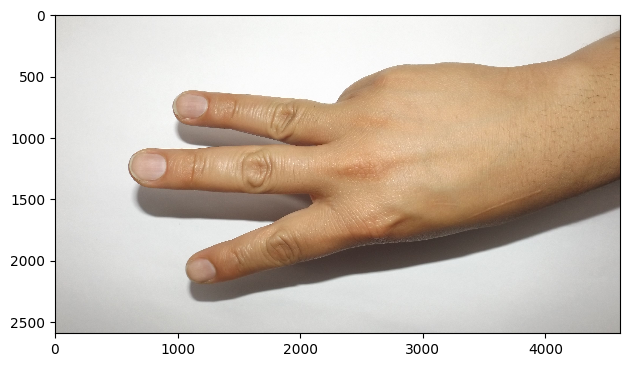

In [31]:
img = io.imread(paths[0], as_gray=False)
io.imshow(img)


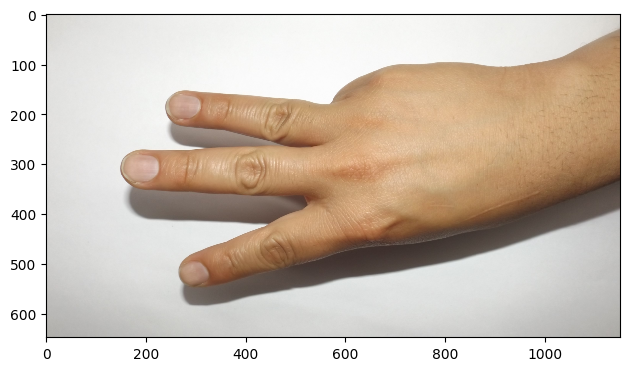

In [33]:
img = transform.rescale(img, 0.25, channel_axis=2)
io.imshow(img)

In [34]:
from preprocessing import AMSR
p_img = AMSR(img)

/root/hand-gesture-recognition/preprocessing.py:7: FutureWarning: Automatic detection of the color channel was deprecated in v0.19, and `channel_axis=None` will be the new default in v0.21. Set `channel_axis=-1` explicitly to silence this warning.
  return np.log10(img) - np.log10(filters.gaussian(img, sigma))


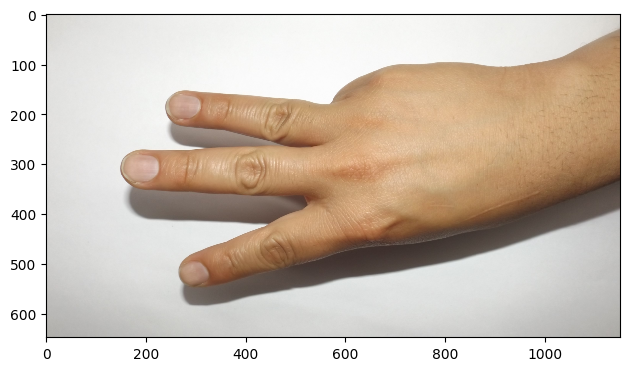

In [36]:
io.imshow(img)

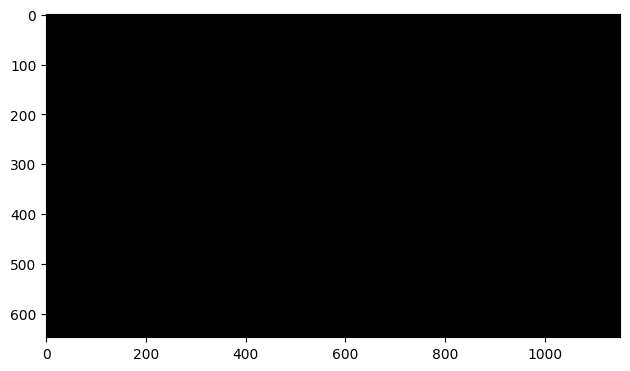

In [40]:
io.imshow(p_img)

In [ ]:
from hog import hog

myhog = hog
skhog = feature.hog


def get_features(img_path: str) -> np.ndarray:
    return np.random.rand(100)

    # read image as gray, floats, resized to half the dimensions
    img = util.img_as_float(io.imread(img_path, as_gray=True))
    # resize to half the dimensions
    img = transform.rescale(img, 0.5, anti_aliasing=True)

    features = myhog(img)

    return features

In [ ]:
features = [get_features(path) for path in paths]

In [ ]:
with open("features.pkl", "wb") as f:
    pickle.dump(features, f)

In [ ]:
# with open("features.pickle", "rb") as f:
# features = pickle.load(f)

In [ ]:
random_state = 312

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    features, labels, test_size=0.2, random_state=random_state
)

In [ ]:
cv = model_selection.KFold(n_splits=5, shuffle=True, random_state=random_state)

In [ ]:
from sklearn.svm import SVC

clf = SVC(kernel="linear")

result = model_selection.cross_validate(
    clf,
    X_train,
    y_train,
    cv=cv,
    scoring=("accuracy", "balanced_accuracy"),
)

result

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
with open("model.pkl", "wb") as f:
    pickle.dump(clf, f)

In [ ]:
# with open("model.pkl", "rb") as f:
#     clf = pickle.load(f)

In [ ]:
clf.score(X_test, y_test)